# This file presents methods for finding the time delaye between two signals using cross correlation 

### Helpful Resources
https://en.wikipedia.org/wiki/Cross-correlation

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import librosa as lr
from scipy import signal

In [2]:
# Read the audio files
ch1, sfreq = lr.load('ch1_RawSound_JULY22.wav') # sfreq is the sampling frequency at which the signal is sampled
ch2, sfreq = lr.load('ch2_RawSound_JULY22.wav')
ch3, sfreq = lr.load('ch3_RawSound_JULY22.wav')

In [3]:
# Method 1: Calculate the time delay between two signals

y1 = ch1
y2 = ch2

correlation = signal.correlate(y1, y2, mode="full")
lags = signal.correlation_lags(y1.size, y2.size, mode="full")
lag = lags[np.argmax(correlation)]

if lag<0:
    print("The signal y2 lags behind signal y1")
elif lag>=0:
    print("The signal y2 leads signal y1")
else:
    print("The lag is Zero between the two signals")
    
print("The lag between two signals is: ",lag)
print("The corresponding time delay between the signals is: ", lag/sfreq, "seconds")

The signal y2 lags behind signal y1
The lag between two signals is:  -6
The corresponding time delay between the signals is:  -0.00027210884353741496 seconds


##### Note: The lag/delay is given with respect to the second signal in the argument of correlate(y1,y2). It tells how mcuh y2 is lagging(if lag is negative) / leading (if lag is positive) with respect to y1

y2 is -0.00027211507627467046 behind y1


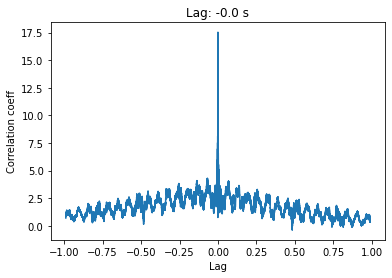

The time delay is:  -0.00027211507627467046


In [4]:
# Method 2: Calculate the time delay between two signals

def lag_finder(y1, y2, sr):
    n = len(y1)

    #corr = signal.correlate(y2, y1, mode='same') / np.sqrt(signal.correlate(y1, y1, mode='same')[int(n/2)] * signal.correlate(y2, y2, mode='same')[int(n/2)])
    corr = signal.correlate(y1, y2, mode='same') 
    
    delay_arr = np.linspace(-0.5*n/sr, 0.5*n/sr, n)
    delay = delay_arr[np.argmax(corr)]
    print('y2 is ' + str(delay) + ' behind y1')

    plt.figure()
    plt.plot(delay_arr, corr)
    plt.title('Lag: ' + str(np.round(delay, 3)) + ' s')
    plt.xlabel('Lag')
    plt.ylabel('Correlation coeff')
    plt.show()
    
    return delay


time_delay = lag_finder(y1,  y2, sfreq)
print("The time delay is: ", time_delay)